In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [63]:
compas = pd.read_csv("compas-scores.csv")
compas.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,is_violent_recid,num_vr_cases,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,NaN,-1,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,NaN,13009779CF10A,F,NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,1,NaN,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,NaN,13011511MM10A,M,0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


In [64]:
colremove = [ 'name', 'first', 'last', 'compas_screening_date','dob','age_cat',
             'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas','r_case_number',
     'r_days_from_arrest', 'r_offense_date',
      'r_jail_in', 'r_jail_out','vr_case_number', 
       'vr_offense_date', 'screening_date',
      'v_screening_date',]

In [65]:
compas2 = compas.drop(colremove, axis =1)
compas2

,id,sex,age,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid,num_r_cases,r_charge_degree,r_charge_desc,is_violent_recid,num_vr_cases,vr_charge_degree,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,type_of_assessment,decile_score.1,score_text
0,1,Male,69,Other,0,1,0,0,0,F,Aggravated Assault w/Firearm,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,1,Low,Risk of Recidivism,1,Low
1,2,Male,31,Caucasian,0,5,0,0,0,O,NaN,-1,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,2,Low,Risk of Recidivism,5,Medium
2,3,Male,34,African-American,0,3,0,0,0,F,Felony Battery w/Prior Convict,1,NaN,F,Felony Battery (Dom Strang),1,NaN,(F3),Felony Battery (Dom Strang),Risk of Violence,1,Low,Risk of Recidivism,3,Low
3,4,Male,24,African-American,0,4,0,1,4,F,Possession of Cocaine,1,NaN,M,Driving Under The Influence,0,NaN,NaN,NaN,Risk of Violence,3,Low,Risk of Recidivism,4,Low
4,5,Male,23,African-American,0,8,1,0,1,F,Possession of Cannabis,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,6,Medium,Risk of Recidivism,8,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11752,11753,Male,47,Other,0,3,0,0,1,F,Burglary Structure Unoccup,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,1,Low,Risk of Recidivism,3,Low
11753,11754,Male,22,Caucasian,0,7,3,5,3,M,Battery,1,NaN,M,Driving License Suspended,0,NaN,NaN,NaN,Risk of Violence,5,Medium,Risk of Recidivism,7,Medium
11754,11755,Male,35,Other,0,4,0,0,0,M,Battery,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,3,Low,Risk of Recidivism,4,Low
11755,11756,Male,29,Caucasian,0,3,0,0,2,M,arrest case no charge,0,NaN,O,NaN,0,NaN,NaN,NaN,Risk of Violence,2,Low,Risk of Recidivism,3,Low


In [90]:
DrugPossession = compas2[compas2['c_charge_desc'].str.contains("Pos",na = False)]
DrugPossession = DrugPossession.rename(columns ={"sex":"Sex"})
x = DrugPossession.c_charge_desc.value_counts(True)

In [86]:
DrugPossession = compas2[compas2['c_charge_desc'].isin(['Possession of Cocaine',
 'Poss Cocaine/Intent To Del/Sel',
 'Poss of Cocaine W/I/D/S 1000FT Park',
 'Poss/Sell/Del Cocaine 1000FT Sch',
 'Poss/Sel/Del Cocaine 1000FT Chur',
 'Possession Of Cocaine',
 'Poss/pur/sell/deliver Cocaine',
 'Purchase Of Cocaine', 
 'Possess Cannabis/20 Grams Or Less',
 'Possession of Cannabis',
 'Purchase Cannabis',
 'Possess Cannabis 1000FTSch',
 'Purchase/P/W/Int Cannabis',
 'Pos Cannabis W/I/D/S Near Worsh',
 'Pos Cannabis For Consideration',
'Poss3,4 Methylenedioxymethcath',
 'Possession Of Alprazolam',
 'Poss Pyrrolidinovalerophenone',
 'Possession Of Heroin',
'Possession Of Methamphetamine',
 'Possession of Oxycodone',
'Poss Contr Subst W/o Prescript',
 'Possession of Hydromorphone',
 'Possession of Hydrocodone',
 'Poss Of Controlled Substance',
 'Possession of Ethylone',
 'Poss 3,4 MDMA (Ecstasy)',
 'Possess Drug Paraphernalia',
'Possession Of Amphetamine',
 'Possession of Morphine',
'Poss Tetrahydrocannabinols',
'Poss Meth/Diox/Meth/Amp (MDMA)',
'Possession of Methadone',
'Possession Of Buprenorphine',
 'Possession of Codeine',
 'Possession of LSD',
'Poss of Methylethcathinone',
 'Possession of Benzylpiperazine',
 'Possession Of Lorazepam',
 'Possession Of 3,4Methylenediox',
 'Possession Of Oxymorphone',
 'Possession Of Fentanyl',
'Possession of XLR11',
 'Possession Of Diazepam',
'Possession Of Clonazepam',
 
'Poss Drugs W/O A Prescription',
'Possession Of Carisoprodol',
 'Poss Of RX Without RX',
 
'Poss 5-Methoxy-N-methyl-N-isop',
 'Poss Pyrrolidinobutiophenone',
 'Possession of Butylone',
'Possess Tobacco Product Under 18',
 'Possession Of Anabolic Steroid',
'Possession Of Phentermine',
'Possession of Alcohol Under 21',
'Possession Of Alcohol Under 21',
 'Possess Controlled Substance',
'Poss Trifluoromethylphenylpipe',
'Poss Of 1,4-Butanediol',
 'Pos Gamma-Hydroxybutyric Acid',
 'Poss 3,4 Methylendioxpyrovlerone',

                        ]) ]
DrugPossession.c_charge_desc.value_counts(True)

Possession of Cocaine                  0.452672
Possess Cannabis/20 Grams Or Less      0.081777
Possession of Cannabis                 0.070187
Poss3,4 Methylenedioxymethcath         0.052157
Possession Of Alprazolam               0.050869
Poss Pyrrolidinovalerophenone          0.045074
Possession Of Heroin                   0.031552
Possession Of Methamphetamine          0.028332
Possession of Oxycodone                0.027044
Poss Cocaine/Intent To Del/Sel         0.019317
Poss Contr Subst W/o Prescript         0.018674
Possession of Hydromorphone            0.013522
Possession of Hydrocodone              0.010947
Poss Of Controlled Substance           0.009015
Possession of Ethylone                 0.008371
Poss 3,4 MDMA (Ecstasy)                0.007727
Possess Drug Paraphernalia             0.007083
Possession Of Amphetamine              0.006439
Possession of Morphine                 0.005151
Purchase Cannabis                      0.005151
Poss of Cocaine W/I/D/S 1000FT Park    0

In [91]:
DrugPossession2 = DrugPossession.groupby(["race","Sex","score_text"]).count().reset_index()[["id","race","score_text","Sex"]]
DrugPossession2                                   

,id,race,score_text,Sex
0,37,African-American,High,Female
1,39,African-American,Low,Female
2,38,African-American,Medium,Female
3,322,African-American,High,Male
4,247,African-American,Low,Male
5,238,African-American,Medium,Male
6,1,Asian,Low,Female
7,1,Asian,Low,Male
8,2,Asian,Medium,Male
9,29,Caucasian,High,Female


In [92]:
DrugPossession3 = DrugPossession2[(DrugPossession2.race == "African-American")| (DrugPossession2.race == "Caucasian")]
DrugPossession3

,id,race,score_text,Sex
0,37,African-American,High,Female
1,39,African-American,Low,Female
2,38,African-American,Medium,Female
3,322,African-American,High,Male
4,247,African-American,Low,Male
5,238,African-American,Medium,Male
9,29,Caucasian,High,Female
10,84,Caucasian,Low,Female
11,53,Caucasian,Medium,Female
12,77,Caucasian,High,Male


In [93]:
Compdum = pd.get_dummies(DrugPossession, prefix=["race","Sex"], columns=["race","Sex"])

In [94]:
Com2 = Compdum
Com2 = Com2.rename(columns ={"race_African-American": "race_African_American"})
Com2.columns

Index(['id', 'age', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc', 'is_recid', 'num_r_cases', 'r_charge_degree', 'r_charge_desc', 'is_violent_recid', 'num_vr_cases', 'vr_charge_degree', 'vr_charge_desc', 'v_type_of_assessment', 'v_decile_score', 'v_score_text', 'type_of_assessment', 'decile_score.1', 'score_text', 'race_African_American', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other', 'Sex_Female', 'Sex_Male'], dtype='object')

In [95]:
Com2 = [Com2[Com2.Sex_Female == 1].race_African_American.sum(),
           Com2[Com2.Sex_Male == 1].race_African_American.sum(),
           Com2[Com2.Sex_Female == 1].race_Caucasian.sum(),
           Com2[Com2.Sex_Male == 1].race_Caucasian.sum(),
          ]
Com2

[114, 808, 166, 530]

In [96]:
Com3 = np.repeat(Com2, 3)
Com3

array([114, 114, 114, 808, 808, 808, 166, 166, 166, 530, 530, 530])

In [97]:
rt = list(Com3)

In [98]:
DrugPossession3['totals'] = rt
DrugPossession3 = DrugPossession3.rename(columns = {"score_text":"Decile Score Category"})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
DrugPossession3["% of Gender/Race Category"] = round(DrugPossession3["id"]/DrugPossession3["totals"]*100, 1)
COMPAS2 = DrugPossession3
COMPAS2 = COMPAS2.rename(columns = {"race": "Race"})
COMPAS2

,id,Race,Decile Score Category,Sex,totals,% of Gender/Race Category
0,37,African-American,High,Female,114,32.5
1,39,African-American,Low,Female,114,34.2
2,38,African-American,Medium,Female,114,33.3
3,322,African-American,High,Male,808,39.9
4,247,African-American,Low,Male,808,30.6
5,238,African-American,Medium,Male,808,29.5
9,29,Caucasian,High,Female,166,17.5
10,84,Caucasian,Low,Female,166,50.6
11,53,Caucasian,Medium,Female,166,31.9
12,77,Caucasian,High,Male,530,14.5


In [115]:
COMPASPIVOT = COMPAS2.pivot_table(
    values = "% of Gender/Race Category",
    index =  'Decile Score Category',
    columns = 'Race'
    
)

In [135]:
MALECOMPASPIVOT = m1.pivot_table(
    values = "% of Gender/Race Category",
    index =  'Decile Score Category',
    columns = 'Race')
MALECOMPASPIVOT.reindex(["Low","Medium","High"])

Race,African-American,Caucasian
Decile Score Category,,
Low,30.6,58.1
Medium,29.5,27.0
High,39.9,14.5


In [127]:
r1 = COMPAS2[(COMPAS2.Race == "African-American")]
r3 = COMPAS2[(COMPAS2.Race == "Caucasian")]

In [125]:
m1 = COMPAS2[(COMPAS2.Sex == "Male")]
m2 = COMPAS2[(COMPAS2.Sex == "Female")]

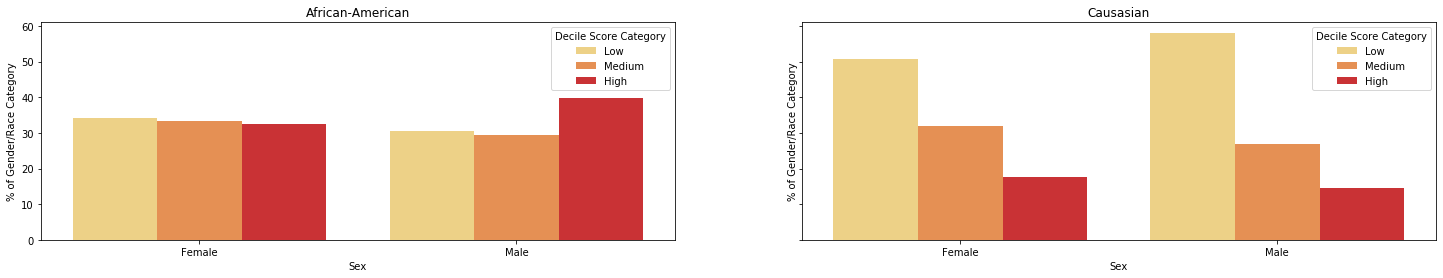

In [104]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
rac1 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r1, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[0])).set_title("African-American")
rac3 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r3, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[1])).set_title("Causasian")

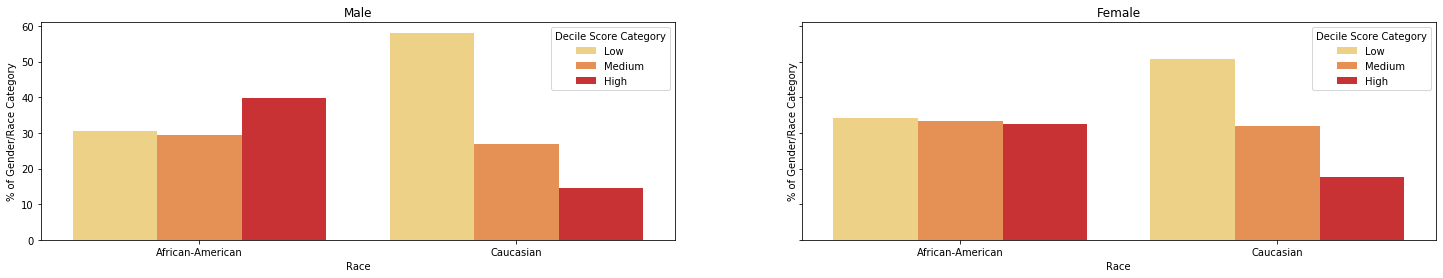

In [128]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
Sex1 = (sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m1, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[0])).set_title("Male")
Sex2 = (sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m2, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd", ax=axes[1])).set_title("Female")

Text(0.5, 1.0, 'Distribution of Decile Score for Drug Possession Offenses: Male Convicts')

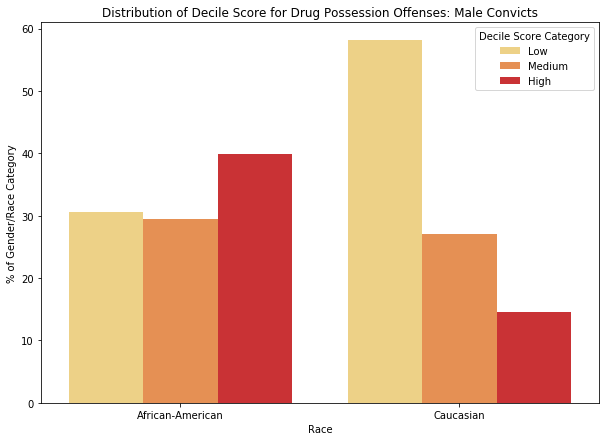

In [129]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
sns.barplot(x= "Race" , y="% of Gender/Race Category", data=m1, hue = "Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd").set_title("Distribution of Decile Score for Drug Possession Offenses: Male Convicts")

In [24]:
VDrugPossession2 = DrugPossession.groupby(["race","Sex","v_score_text"]).count().reset_index()[["id","race","v_score_text","Sex"]]
VDrugPossession2                                   

,id,race,v_score_text,Sex
0,7,African-American,High,Female
1,49,African-American,Low,Female
2,8,African-American,Medium,Female
3,61,African-American,High,Male
4,213,African-American,Low,Male
5,112,African-American,Medium,Male
6,1,Asian,Low,Female
7,1,Asian,Low,Male
8,1,Caucasian,High,Female
9,62,Caucasian,Low,Female


In [25]:
VDrugPossession3 = VDrugPossession2[(VDrugPossession2.race == "African-American")| (VDrugPossession2.race == "Caucasian")]
VDrugPossession3

,id,race,v_score_text,Sex
0,7,African-American,High,Female
1,49,African-American,Low,Female
2,8,African-American,Medium,Female
3,61,African-American,High,Male
4,213,African-American,Low,Male
5,112,African-American,Medium,Male
8,1,Caucasian,High,Female
9,62,Caucasian,Low,Female
10,10,Caucasian,Medium,Female
11,9,Caucasian,High,Male


In [26]:
VCompdum = pd.get_dummies(DrugPossession, prefix=["race","Sex"], columns=["race","Sex"])

In [27]:
VCom2 = VCompdum
VCom2 = VCom2.rename(columns ={"race_African-American": "race_African_American"})
VCom2.columns

Index(['id', 'age', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc',
       'is_recid', 'num_r_cases', 'r_charge_degree', 'r_charge_desc',
       'is_violent_recid', 'num_vr_cases', 'vr_charge_degree',
       'vr_charge_desc', 'v_type_of_assessment', 'v_decile_score',
       'v_score_text', 'type_of_assessment', 'decile_score.1', 'score_text',
       'race_African_American', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other', 'Sex_Female',
       'Sex_Male'],
      dtype='object')

In [28]:
VCom2 = [VCom2[VCom2.Sex_Female == 1].race_African_American.sum(),
           VCom2[VCom2.Sex_Male == 1].race_African_American.sum(),
           VCom2[VCom2.Sex_Female == 1].race_Caucasian.sum(),
           VCom2[VCom2.Sex_Male == 1].race_Caucasian.sum(),
          ]
VCom2

[64, 386, 73, 215]

In [29]:
VCom3 = np.repeat(VCom2, 3)
rt = list(VCom3)

In [30]:
VDrugPossession3['totals'] = rt
VDrugPossession3 = VDrugPossession3.rename(columns = {"v_score_text":"Violent Decile Score Category"})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
VDrugPossession3["% of Gender/Race Category"] = round(VDrugPossession3["id"]/VDrugPossession3["totals"]*100, 1)
VCOMPAS2 = VDrugPossession3
VCOMPAS2 =  VCOMPAS2.set_index("Violent Decile Score Category").reset_index()

In [32]:
VCOMPASPIVOT = VCOMPAS2.pivot_table(
    values = "% of Gender/Race Category",
    index = 'race', 
    columns = 'Violent Decile Score Category'
)
VCOMPASPIVOT

Violent Decile Score Category,High,Low,Medium
race,,,
African-American,13.35,65.9,20.75
Caucasian,2.80,82.0,15.20


In [33]:
r1 = VCOMPAS2[(VCOMPAS2.race == "African-American")]
r3 = VCOMPAS2[(VCOMPAS2.race == "Caucasian")]

m1 = VCOMPAS2[(VCOMPAS2.Sex == "Male")]
m2 = VCOMPAS2[(VCOMPAS2.Sex == "Female")]

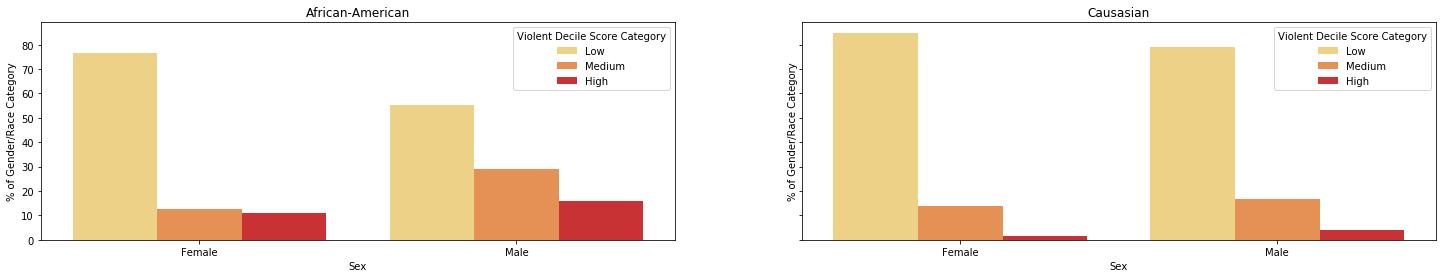

In [34]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
rac1 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r1, hue = "Violent Decile Score Category", hue_order = ["Low", "Medium","High",],palette="YlOrRd", ax=axes[0])).set_title("African-American")
rac3 = (sns.barplot(x= "Sex" , y="% of Gender/Race Category", data=r3, hue = "Violent Decile Score Category", hue_order = ["Low", "Medium","High",],palette="YlOrRd", ax=axes[1])).set_title("Causasian")

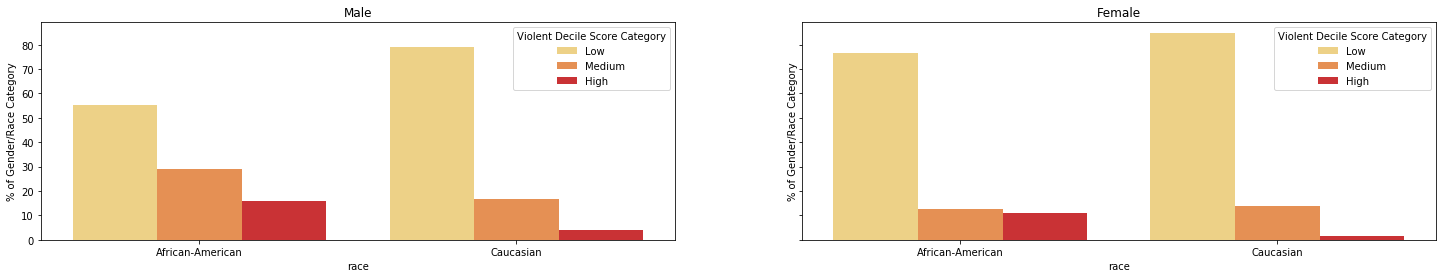

In [35]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(25, 4))
Sex1 = (sns.barplot(x= "race" , y="% of Gender/Race Category", data=m1, hue = "Violent Decile Score Category", hue_order = ["Low", "Medium","High",],palette="YlOrRd", ax=axes[0])).set_title("Male")
Sex2 = (sns.barplot(x= "race" , y="% of Gender/Race Category", data=m2, hue = "Violent Decile Score Category", hue_order = ["Low", "Medium","High",],palette="YlOrRd", ax=axes[1])).set_title("Female")

Text(0.5, 1.0, 'Distribution of Violent Decile Score for Cocaine-Related Offenses: Male Convicts')

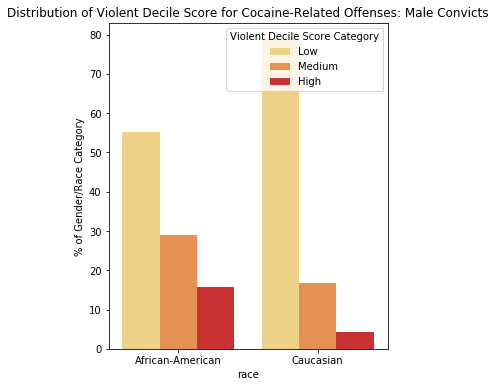

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 6
sns.barplot(x= "race" , y="% of Gender/Race Category", data=m1, hue = "Violent Decile Score Category", hue_order = ["Low","Medium", "High",],palette="YlOrRd").set_title("Distribution of Violent Decile Score for Cocaine-Related Offenses: Male Convicts")